In [32]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv(r'C:\Users\APOORVA\Desktop\MACHINE LEARNING\Recording\19\bankdata.csv')

In [34]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [35]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


 ## Problem Statement : We have to identify whether a person will take a pesronal loan from the bank  or not

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [37]:
df.isna().apply(pd.value_counts).T

,False
ID,5000
Age,5000
Experience,5000
Income,5000
ZIP Code,5000
Family,5000
CCAvg,5000
Education,5000
Mortgage,5000
Personal Loan,5000


In [38]:
corr=df.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [39]:
corr[['Personal Loan']]

,Personal Loan
ID,-0.024801
Age,-0.007726
Experience,-0.007413
Income,0.502462
ZIP Code,0.000107
Family,0.061367
CCAvg,0.366889
Education,0.136722
Mortgage,0.142095
Personal Loan,1.000000


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

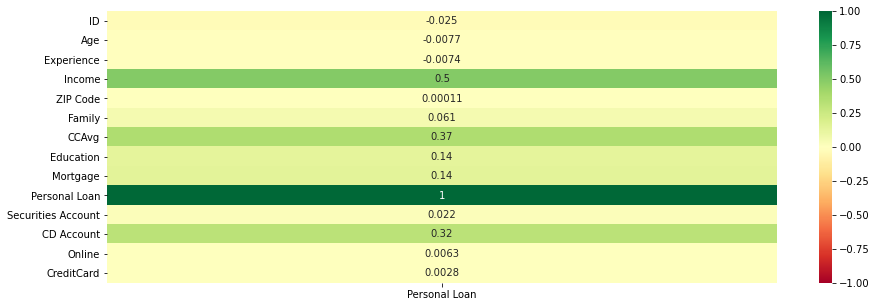

In [41]:
plt.figure(figsize=(15,5))
sns.heatmap(corr[['Personal Loan']],cmap='RdYlGn',vmax=1.0,vmin=-1.0,annot=True)
plt.show()

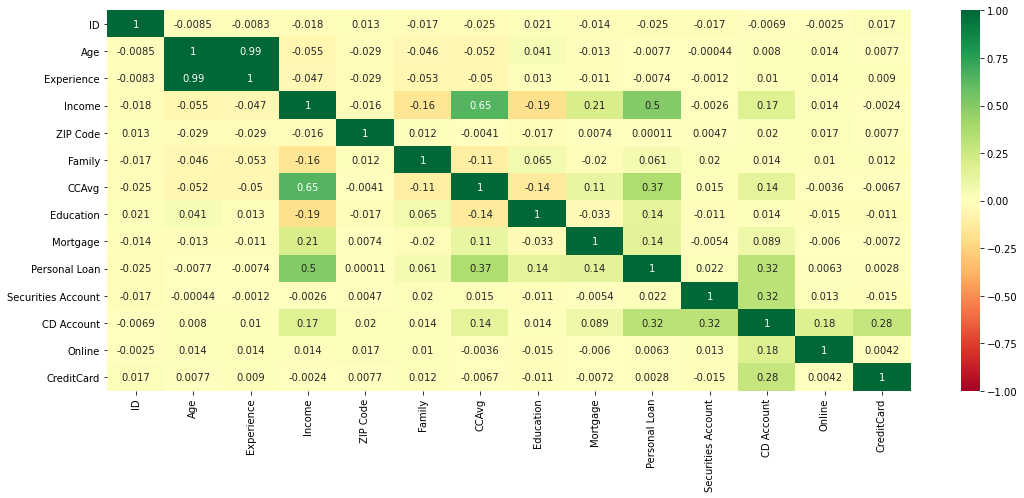

In [42]:
plt.figure(figsize=(18,7))
sns.heatmap(corr,cmap='RdYlGn',vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [43]:
X=df.drop(['ID','Age','Experience','ZIP Code','CCAvg','Personal Loan'],axis=1)

In [44]:
y=df[['Personal Loan']]

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [47]:
X_train.shape

(3500, 8)

In [48]:
y_train.shape

(3500, 1)

In [49]:
X_test.shape

(1500, 8)

In [50]:
y_test.shape

(1500, 1)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model=LogisticRegression()

In [53]:
model.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred=model.predict(X_test)

In [55]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [57]:
accuracy_score(y_test,y_pred)*100

94.66666666666667

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.84      0.57      0.68       149

    accuracy                           0.95      1500
   macro avg       0.90      0.78      0.83      1500
weighted avg       0.94      0.95      0.94      1500



In [59]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[1335,   16],
       [  64,   85]], dtype=int64)

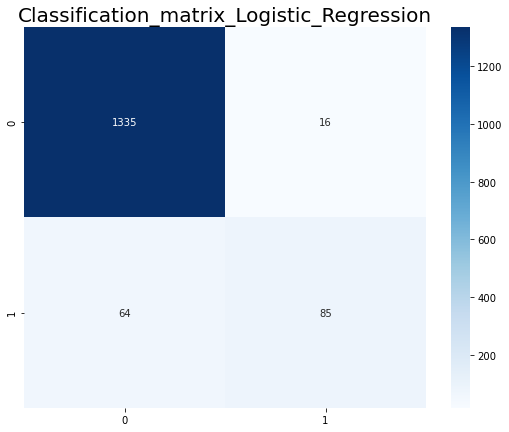

In [71]:
plt.figure(figsize=(9,7))
plt.title('Classification_matrix_Logistic_Regression', fontsize=20)
sns.heatmap(cf,cmap='Blues',annot=True,fmt='g')
plt.show()

After executing the code, we get 1335+85=1420 correct predictions and 16+64=80 incorrect predictions. 


In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn=KNeighborsClassifier(n_neighbors=3)

In [66]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
knn_pred=knn.predict(X_test)

In [69]:
accuracy_score(y_test,knn_pred)*100

92.53333333333333

In [76]:
cf_knn=confusion_matrix(y_test,knn_pred)
cf_knn

array([[1315,   36],
       [  76,   73]], dtype=int64)

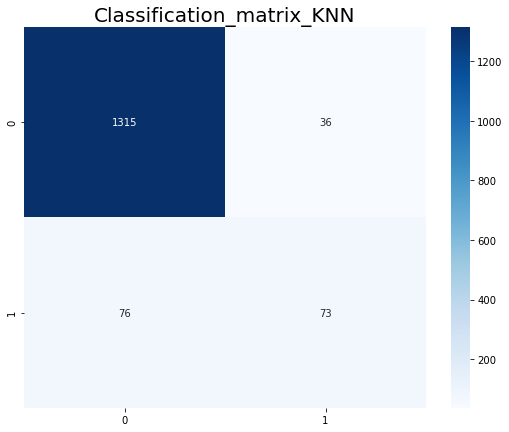

In [75]:
plt.figure(figsize=(9,7))
plt.title('Classification_matrix_KNN', fontsize=20)
sns.heatmap(cf_knn,cmap='Blues',annot=True,fmt='g')
plt.show()

Conclusion : 
After executing the code, we get 1315+73=1388 correct predictions and 112 incorrect predictions. 

